Цель: применить на практике базовые ансамблевые методы

1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Подготовьте датасет к обучению моделей.

a) Категориальные переменные переведите в цифровые значения.

In [ ]:
heart = pd.get_dummies (heart, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='int')
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X = heart.drop(columns='HeartDisease')
y = heart['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
forest_model = RandomForestClassifier(random_state=10)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [ ]:
y_pred_tree = tree_model.predict(X_test)
print(classification_report(y_test, y_pred_tree, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.85      0.76      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



In [ ]:
y_pred_forest = forest_model.predict(X_test)
print(classification_report(y_test, y_pred_forest, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [ ]:
imp = pd.Series(forest_model.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)

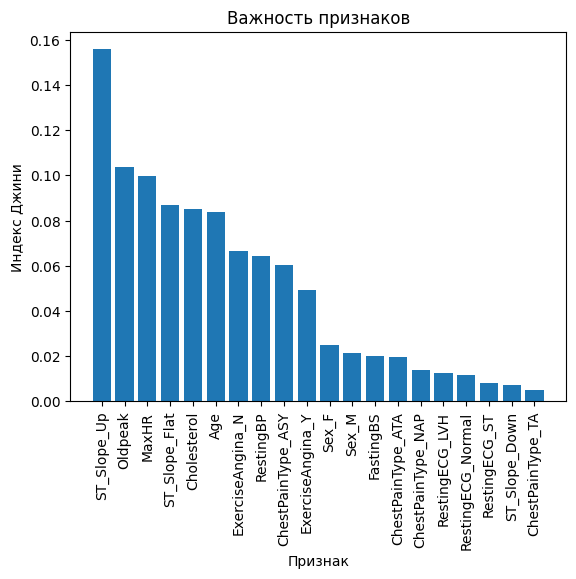

In [ ]:
plt.title('Важность признаков')
plt.xlabel('Признак')
plt.ylabel('Индекс Джини')
plt.xticks(rotation=90)
plt.bar(imp.index, imp)
plt.show()

Самым значимым является признак ST_Slope_Up.

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

a) Повторите п. 5

In [ ]:
bagging_tree = BaggingClassifier(tree_model, n_estimators=10)
bagging_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=10))

In [ ]:
y_pred_bagging = bagging_tree.predict(X_test)
print(classification_report(y_test, y_pred_bagging, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        77
           1       0.96      0.81      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184



8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

a) Повторите п. 5

In [ ]:
stack_model = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier()),
        ('LinearSVC', LinearSVC())
    ], LogisticRegression()
)
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stack = stack_model.predict(X_test)
print(classification_report(y_test, y_pred_stack, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



9. Сформулируйте выводы по проделанной работе.

В ходе выполнения работы были построены модели дерева решений, случайного леса, обучен бэггинг над моделью дерева решений и стекинг трех моделей. При предсказании на тестовой выборке лучшие значения были достигнуты для метрики f1-score для класса 1 при использовании модели случайного леса (0,89), а для класса 0 — при обучении бэггинга над случайным лесом (0,88). Но все значения f1-score > 0.8 для двух классов (кроме модели дерева решений), так что разрыв между точностью полученных моделей небольшой. И поэтому выбор оптимальной модели зависит от конкретной задачи.